# Linear Regression
#### UD2. Aprendizaxe Supervisada
#### MP. Sistemas de Aprendizaxe Automáticos
#### IES de Teis (Vigo), Cristina Gómez Alonso

En estadística, **la regresión lineal es un enfoque lineal para modelar la relación entre una variable dependiente escalar y y una o más variables explicativas (o variables independientes) denominadas X**. El caso de una variable explicativa se denomina **regresión lineal simple o univariable**. Para más de una variable explicativa, el proceso se denomina **regresión lineal múltiple**.
Los modelos de regresión lineal a menudo se ajustan/entrenan utilizando la aproximación de mínimos cuadrados, pero también se pueden ajustar de otras maneras, como minimizando la "falta de ajuste" en alguna otra norma (como en la regresión de mínimas desviaciones absolutas), o minimizando una penalización de la función de pérdida por mínimos cuadrados como en la ridge regression y lasso.
Tener en cuenta, que la aproximación de mínimos cuadrados se puede utilizar para ajustar modelos que no sean modelos lineales. Así, aunque los términos “mínimos cuadrados” y “modelo lineal” están estrechamente vinculados, no son sinónimos.
En este notebook volveremos a utilizar el notebook de estimación de precios que vimos en el notebook de Exploratory Data Analysis. Tenéis todos los detalles en  la web de [kaggle](https://www.kaggle.com/camnugent/california-housing-prices)

## 1. Importación de paquetes y dataset

In [110]:
# Estas son las bibliotecas necesarias para la manipulación de datos en el ejercicio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos, fichero “housing.csv”
df = pd.read_csv("./data/housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


## 2. EDA y Visual EDA

In [111]:
# Visualización preliminar de los datos. Mostrar las primeras filas del dataframe
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [112]:
# Comprobar la información del dataframe cargado
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [113]:
# Comprobar si existen valores nulos o faltan
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [114]:
# Primera aproximación estadística de los datos de que disponemos
# Visualiza los parámetros estadíscos tipo de cada columna del dataframe:
# - Número de datos
# - Madia
# - Desviación estándar
# - Valor máximo
# - Valor mínimo
# - Percentiles
df.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
10%,-122.290000,33.630000,13.000000,941.000000,198.000000,510.000000,184.000000,1.903800,82300.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
90%,-117.250000,38.480000,46.000000,4651.500000,965.000000,2566.000000,890.000000,6.159210,376600.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [115]:
# Listar columnas del dataframe

df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

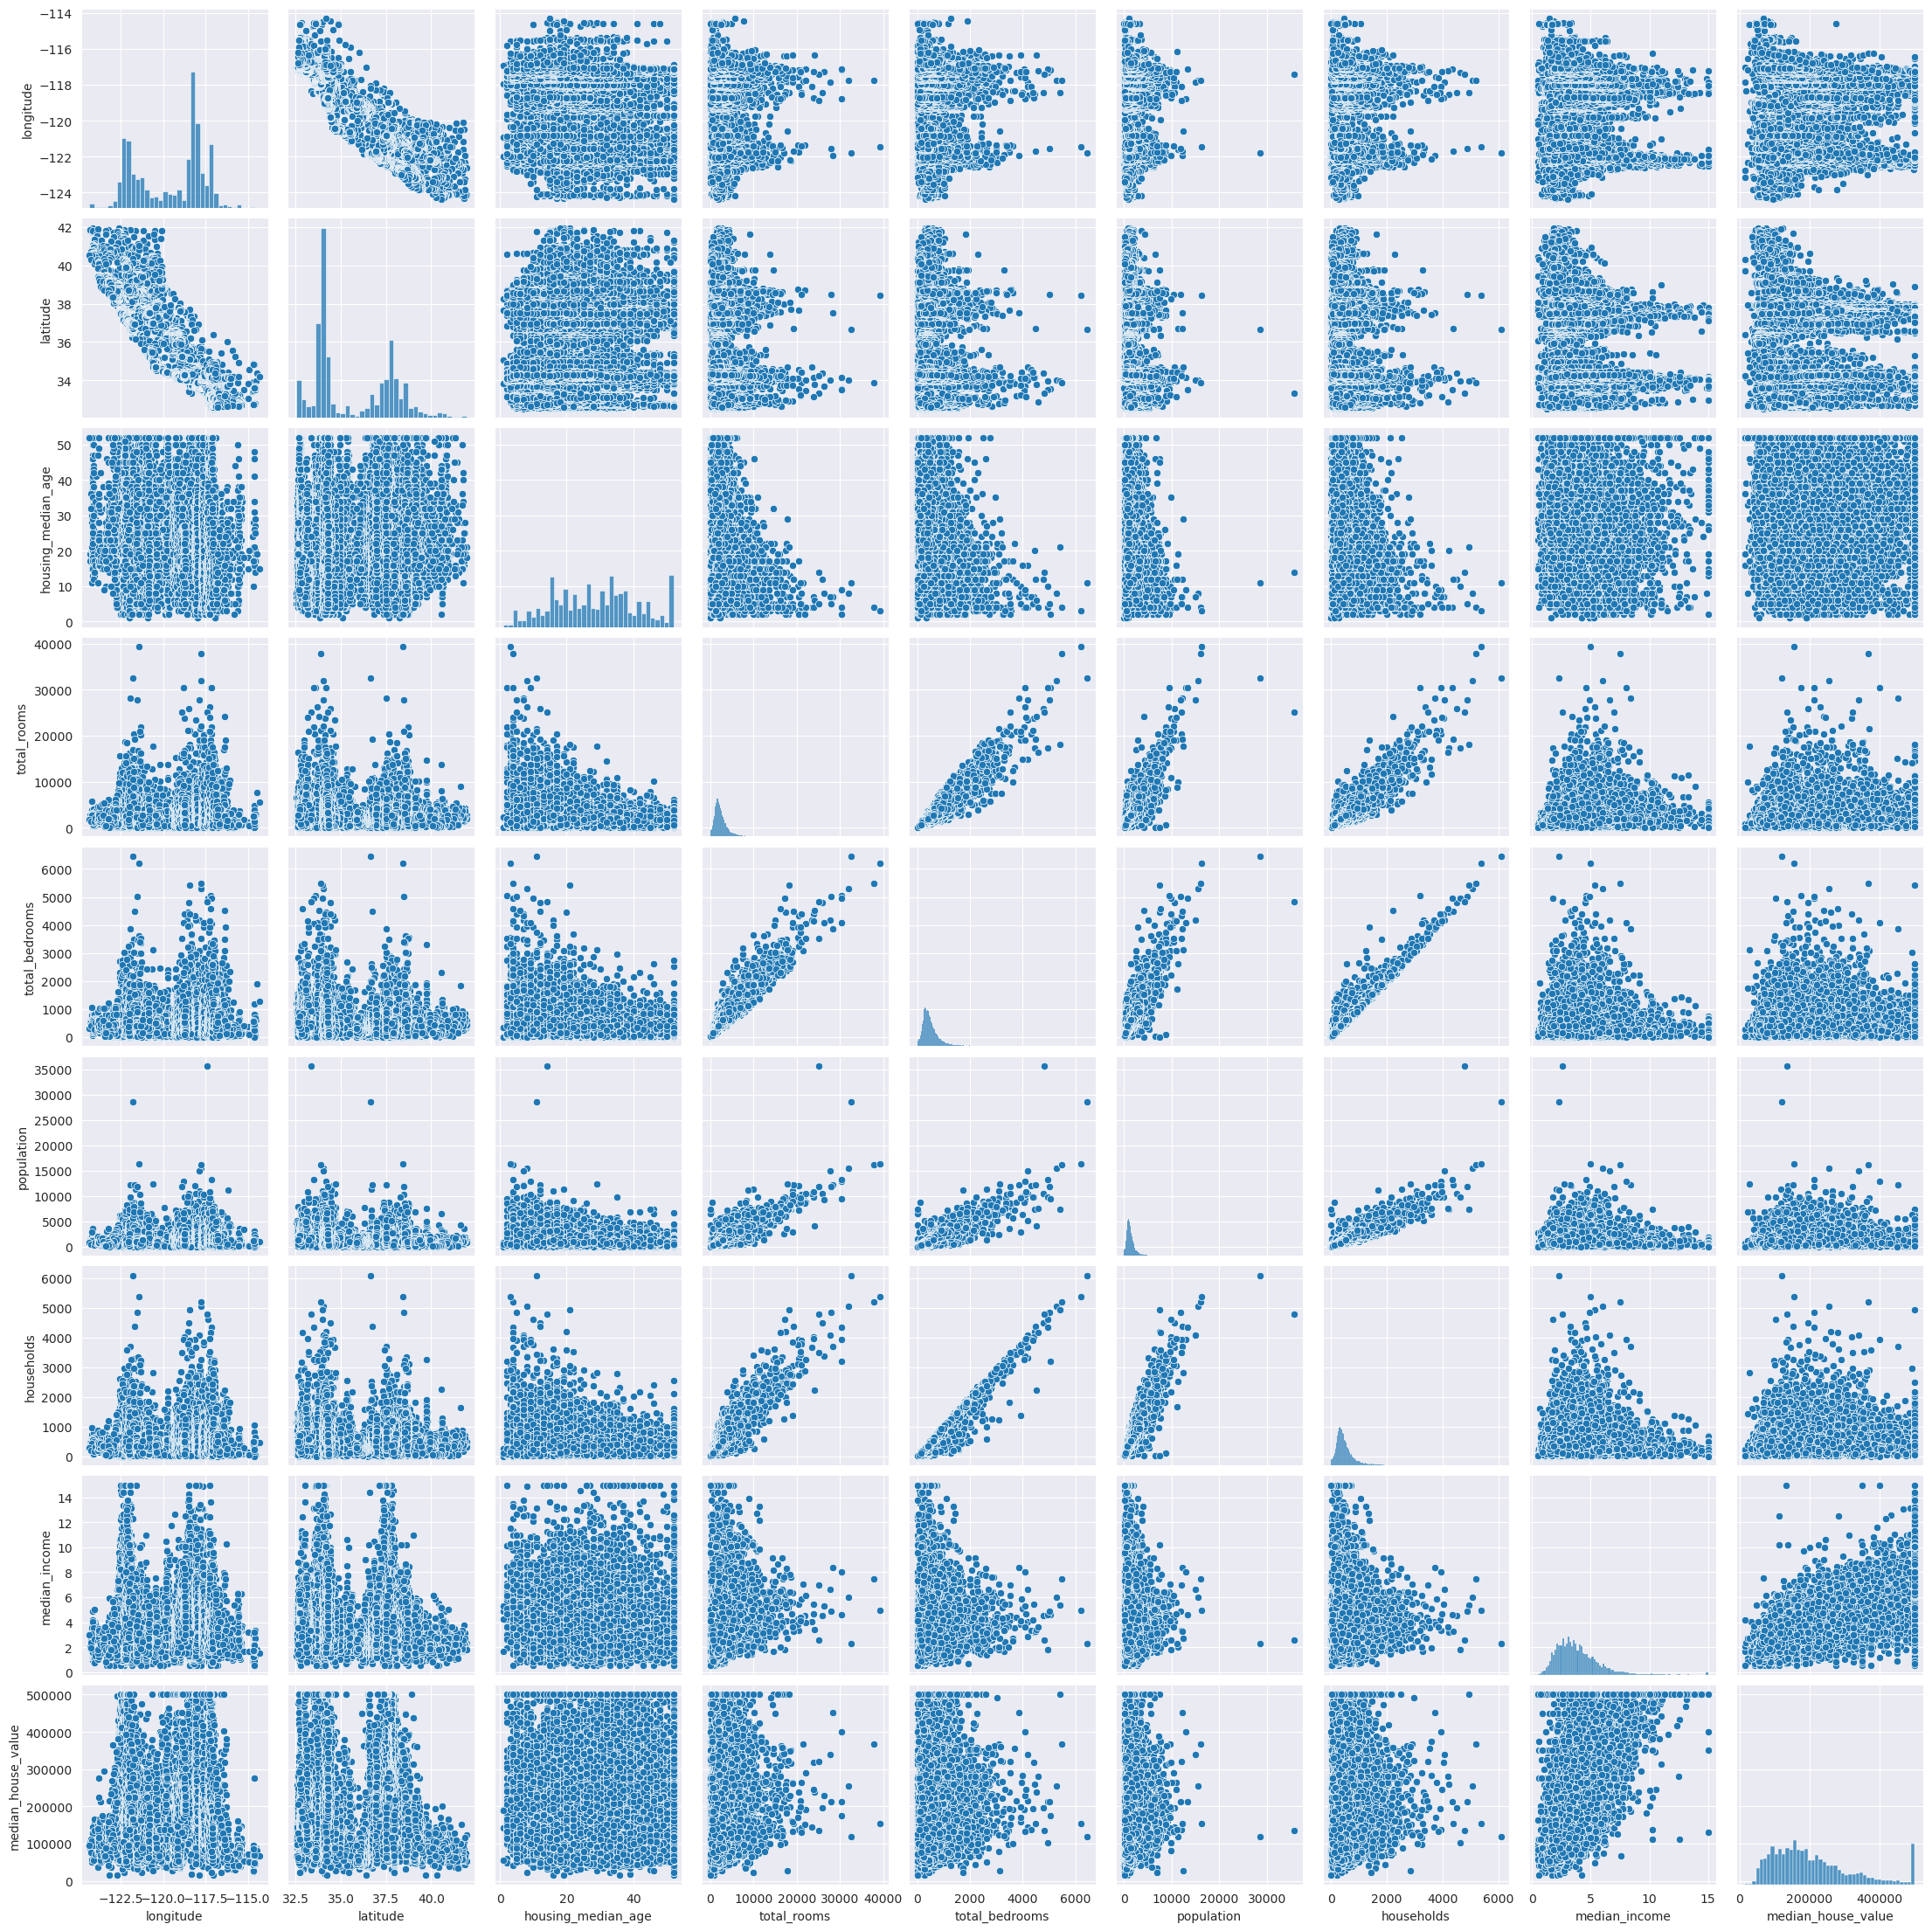

In [116]:
#Mostrar gráficamente relaciones entre columnas numéricas
sns.pairplot(df)

<AxesSubplot:ylabel='Frequency'>

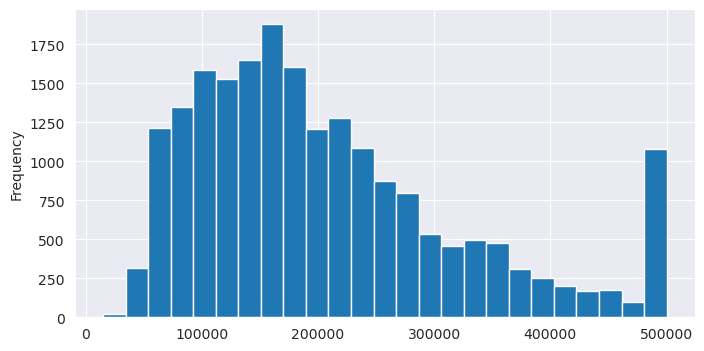

In [117]:
df['median_house_value'].plot.hist(bins=25,figsize=(8,4))

<AxesSubplot:ylabel='Density'>

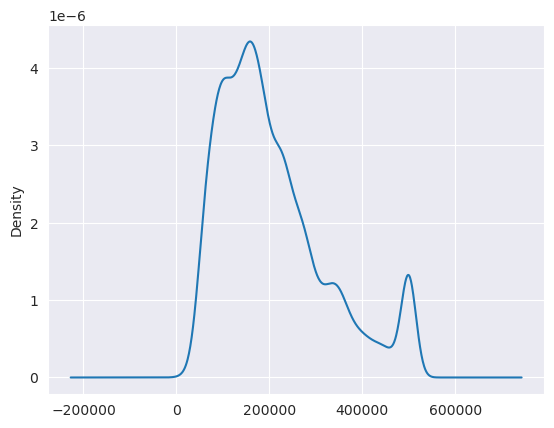

In [118]:
df['median_house_value'].plot.density()

In [119]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


<AxesSubplot:>

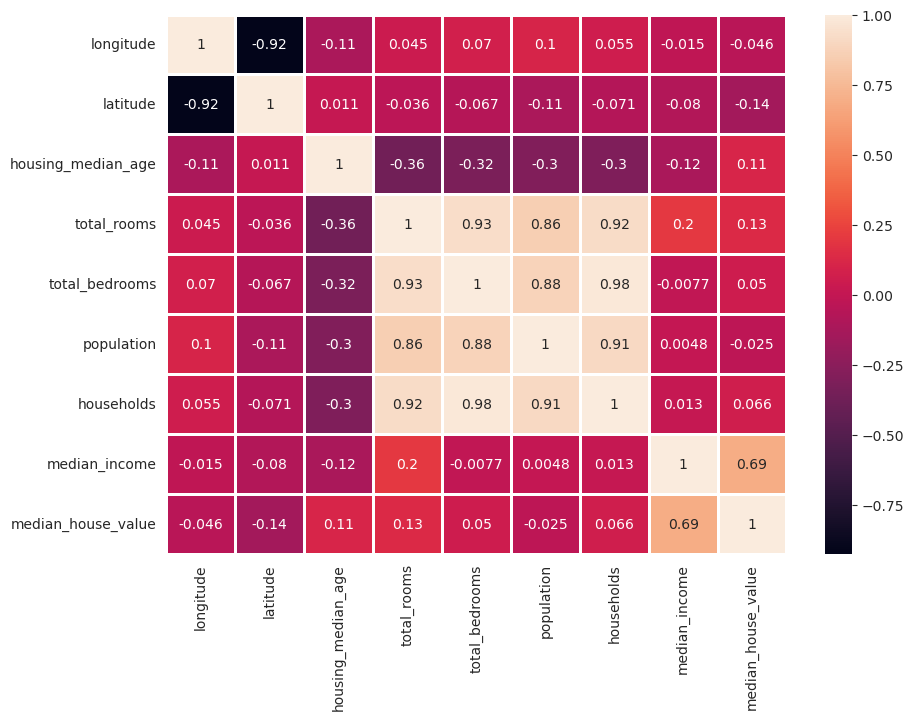

In [120]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,linewidths=2)

## 3. Preprocessing

In [121]:
# Estrategias de acción ante posibles valores nulos o NaN
# (1) Eliminarlos del conjunto de datos
# (2) Rellenar esos valores con el valor medio del resto de valores de la columna
# (3) Rellenar esos valores con el valor más común en la columna (moda)
# (4) Otra estrategia en función del conocimiento del negocio, bbdd, etc.

# En este caso, vamos a elegir la estrategia (1)
# Vamos rellenar los valores no existentes con al valor medio de su columna
df['total_bedrooms'].fillna(df['total_bedrooms'].mean())

0         129.0
1        1106.0
2         190.0
3         235.0
4         280.0
          ...  
20635     374.0
20636     150.0
20637     485.0
20638     409.0
20639     616.0
Name: total_bedrooms, Length: 20640, dtype: float64

In [122]:
# Tratamiento de las variables categóricas
# Convertir las variables categóricas a numéricas
# Si solo es una columna:
from sklearn.preprocessing import LabelEncoder
class_label_encoder = LabelEncoder()
df['ocean_proximity'] = class_label_encoder.fit_transform(df['ocean_proximity'].values)
# Si tenemos múltiples columnas, haríamos:
from sklearn.preprocessing import LabelEncoder
df=df.apply(LabelEncoder().fit_transform)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,170,515,40,733,128,296,125,12416,3,3665
1,171,513,20,5255,1103,2346,1129,12411,3,3074
2,169,512,51,1316,189,469,176,11941,3,3017
3,168,512,51,1123,234,531,218,10269,3,2917
4,168,512,51,1476,279,538,258,6656,3,2925


## 4. División del dataset

Ponemos todas las características numéricas en X y el precio(median_house_value) en y.

In [123]:
# Separar las variables (X) y las etiquetas (y) del conjunto de datos
X = df.iloc[:, :-1].values
# Separar la etiqueta (y) median_house_value
y = df.iloc[:, [-1]].values
print("Feature set size:",X.shape)
print("Variable set size:",y.shape)


Feature set size: (20640, 9)
Variable set size: (20640, 1)


In [124]:
#Otra alternativa equivalente a lo anterior si no queremos utilizar iloc también podemos acceder por columnas
#l_column = list(df.columns) # Making a list out of column names
#len_feature = len(l_column) # Length of column vector list
#l_column
#X = df[l_column[0:len_feature-1]]
#y = df[l_column[len_feature-1]]
#print("Feature set size:",X.shape)
#print("Variable set size:",y.shape)
#X.head()
#y.head()

Dividimos el dataset en 4 grupos:

In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Verificamos las divisiones train/test (deben estar en la proporción según el parámetro test_size anterior)

In [126]:
print("Training feature set size:",X_train.shape)
print("Test feature set size:",X_test.shape)
print("Training variable set size:",y_train.shape)
print("Test variable set size:",y_test.shape)

Training feature set size: (16512, 9)
Test feature set size: (4128, 9)
Training variable set size: (16512, 1)
Test variable set size: (4128, 1)


## 5. Estandarización de los datos

In [127]:
# La estandarización de los datos es importante, como parte del preproceso
# y limpieza de los mismos y antes de haber sido usados en la elaboración del modelo.
from sklearn.preprocessing import StandardScaler
#Se aplican el scaler a los datos de entrada nuevos (test) o de entrenamiento para que los datos sean lo más parecidos a la realidad posibles
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

## 6. Creación del modelo Linear Regression

In [128]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

## 7. Entrenamiento

In [129]:
lm.fit(X_train,y_train)

LinearRegression()

In [130]:
print("The intercept term of the linear model:", lm.intercept_)

The intercept term of the linear model: [-8.43458455e-18]


In [131]:
print("The coefficients of the linear model:", lm.coef_)

The coefficients of the linear model: [[-0.81199592 -0.87464361  0.13148395  0.06411308  0.05737731 -0.4711085
   0.39500126  0.58309433 -0.01878165]]


In [132]:
#cdf = pd.DataFrame(data=lm.coef_, index=X_train.columns, columns=["Coefficients"])
#cdf

## 8. Predicción

In [133]:
# Realizamos una predicción con el modelo de regresión lineal
predictions = lm.predict(X_test)
print ("Type of the predicted object:", type(predictions))
print ("Size of the predicted object:", predictions.shape)

Type of the predicted object: <class 'numpy.ndarray'>
Size of the predicted object: (4128, 1)


## 9. Cálculo de errores

In [134]:
#En la regresión linel nos fijaremos principalmente en el MSE Error Cuadrático Medio
# Calcular el error cometido en la predicción mediante el uso de la raiz del error cuadrático medio
from sklearn import metrics

from sklearn.metrics import mean_squared_error

mseLinear = metrics.mean_squared_error(y_test,predictions)
print('Error Cuadrático Medio (MSE) para el modelo de regresión linear = %.5f' % mseLinear)

Error Cuadrático Medio (MSE) para el modelo de regresión linear = 0.37602


In [135]:
#También podemos mostrar otros errores

print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print("R-squared value of predictions:",round(metrics.r2_score(y_test,predictions),3))

Mean absolute error (MAE): 0.4733160732619852
Mean square error (MSE): 0.37601963416788137
Root mean square error (RMSE): 0.6132043983598628
R-squared value of predictions: 0.617


## 10. Gráfico de puntos del precio predicho y el y_test

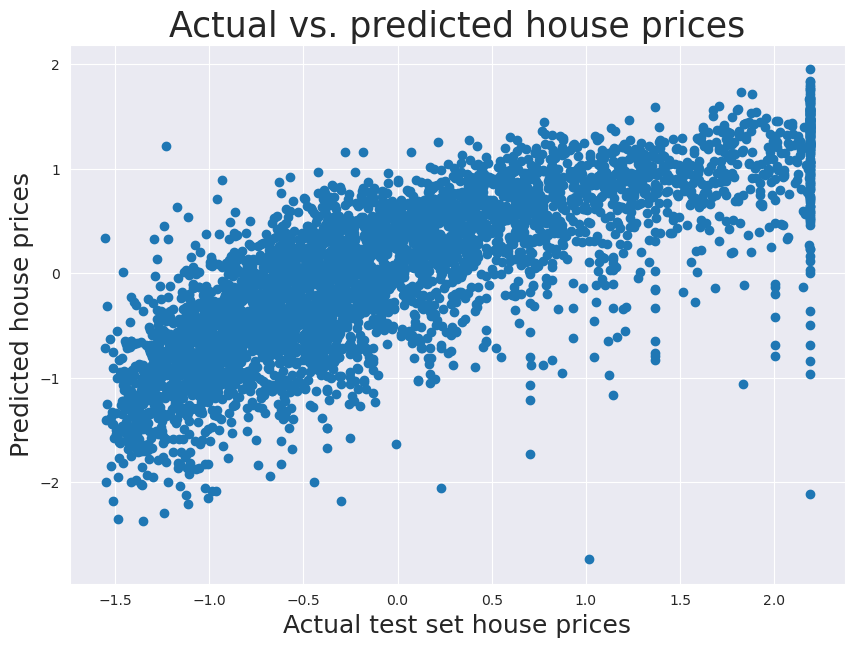

In [136]:
plt.figure(figsize=(10,7))
plt.title("Actual vs. predicted house prices",fontsize=25)
plt.xlabel("Actual test set house prices",fontsize=18)
plt.ylabel("Predicted house prices", fontsize=18)
plt.scatter(x=y_test,y=predictions)

## 11. Regresión Lineal Univariable

 Raíz del Error Cuadrático Medio (RMSE) para el modelo de regresión linear = 0.56158


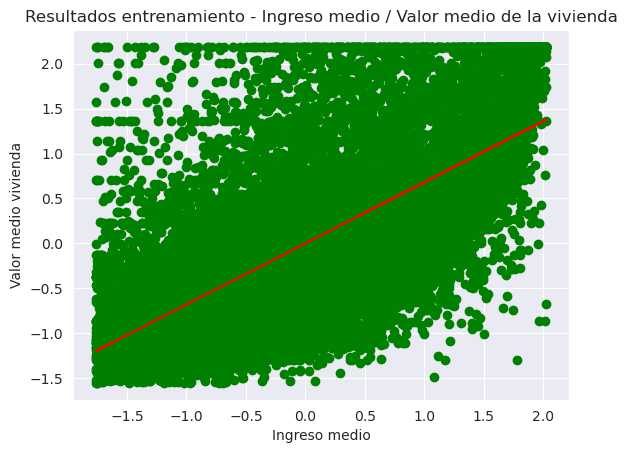

In [137]:
#Regresión lineal solo con la variable median_income

X_train_median_income = X_train[: , [7]]
X_test_median_income = X_test[: , [7]]

# Construye un modelo de regresión lineal usando esta vez median_income como
# variable independiente.
from sklearn.linear_model import LinearRegression
linearRegression2 = LinearRegression()

# Entrenar el modelo anterior
linearRegression2.fit(X_train_median_income, y_train)
# Realiza la predicción con el modelo anterior
predictionLinear2 = linearRegression2.predict(X_test_median_income)


mseLinear2 = mean_squared_error(y_test, predictionLinear2)

print(' Raíz del Error Cuadrático Medio (RMSE) para el modelo de regresión linear = %.5f' % mseLinear2)

plt.scatter(X_train_median_income, y_train, color = 'green')
# X = X_train_median_income
# Y = linearRegression2.predict(X_train_median_income)
plt.plot (X_train_median_income, linearRegression2.predict(X_train_median_income), color = 'red')

plt.title ('Resultados entrenamiento - Ingreso medio / Valor medio de la vivienda')
plt.xlabel('Ingreso medio')
plt.ylabel('Valor medio vivienda')
plt.show()

### *Ejercicio: Alturas*

Con el dataset heights.csv (altura de padres e hijos):

1. Crea un dataframe de pandas con la información del dataset.

In [138]:
df = pd.read_csv("./data/heights.csv")
df.head()

,Father,Son
0,165.100,151.892
1,160.782,160.528
2,165.100,160.782
3,167.132,159.512
4,155.194,163.322


2. Muestra la información del dataset y un gráfico que relacione ambos datos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1078 entries, 0 to 1077
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Father  1078 non-null   float64
 1   Son     1078 non-null   float64
dtypes: float64(2)
memory usage: 17.0 KB


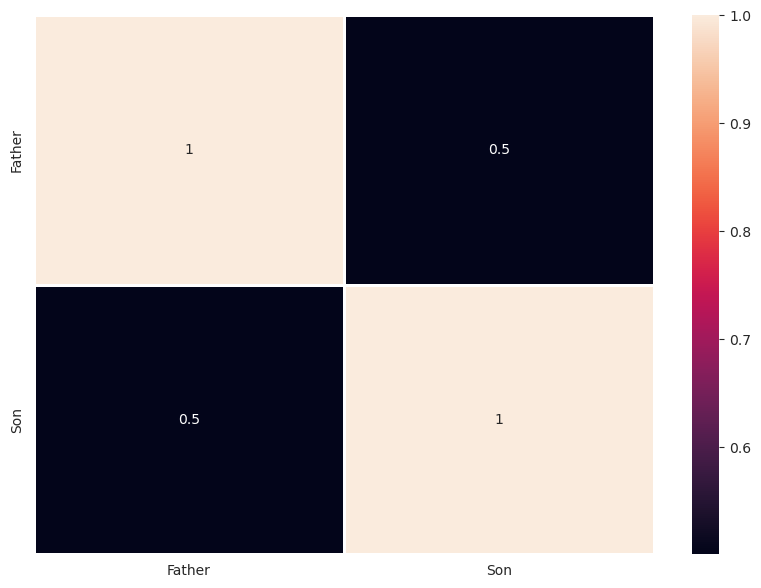

In [139]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,linewidths=2)
df.info()

3. Separa el dataframe en 4 grupos: X_train (característica de entrenamiento: altura de los padres), X_test (característica de test, 30% de las filas), y_train(etiqueta de entrenamiento: altura de los hijos), y_test(etiqueta de test).

In [140]:
from sklearn.model_selection import train_test_split

X = df['Father'].values
y = df['Son'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

4. Muestra el número de registros de cada grupo (entrenamiento y test)

In [141]:
print("Training feature set size:",X_train.shape)
print("Test feature set size:",X_test.shape)
print("Training variable set size:",y_train.shape)
print("Test variable set size:",y_test.shape)

Training feature set size: (754,)
Test feature set size: (324,)
Training variable set size: (754,)
Test variable set size: (324,)


5. Entrena un modelo de regresión lineal con sklearn y muestra los coeficientes (constante y pendiente).

In [142]:
from sklearn.linear_model import LinearRegression
X_test = X_test.reshape(-1, 1)
X_train = X_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
y_test= y_test.reshape(-1, 1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

lm = LinearRegression()
lm.fit(X_train,y_train)
print("The coefficients of the linear model:", lm.coef_)
print("The intercept term of the linear model:", lm.intercept_)



The coefficients of the linear model: [[0.50413382]]
The intercept term of the linear model: [-6.5995298e-15]


8. Calcula las predicciones de los datos de test y muestra los valores de las diferentes métricas.

In [143]:
linearPrediction = lm.predict(X_test)
mseLinear = mean_squared_error(y_test, linearPrediction)
print('Raíz del Error Cuadrático Medio (RMSE) para el modelo de regresión linear = %.5f' % mseLinear)

Raíz del Error Cuadrático Medio (RMSE) para el modelo de regresión linear = 0.80370


6. MUestra un gráfico con los puntos y la recta de regresión.

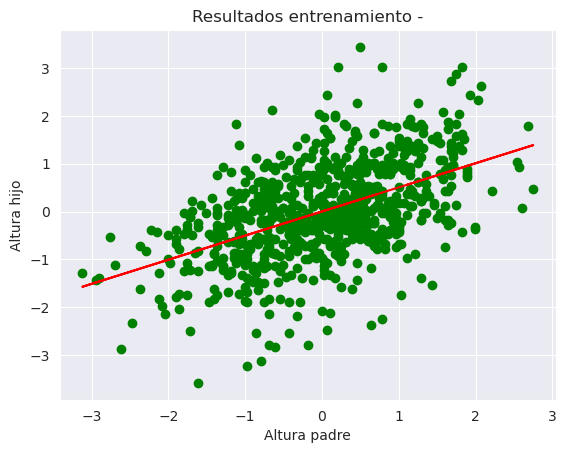

In [144]:
plt.scatter(X_train, y_train, color = 'green')
# X = X_train_median_income
# Y = linearRegression2.predict(X_train_median_income)
plt.plot (X_train, lm.predict(X_train), color = 'red')

plt.title ('Resultados entrenamiento -')
plt.xlabel('Altura padre')
plt.ylabel('Altura hijo')
plt.show()

7. Muestra las métricas de los datos de entrenamiento.

In [145]:
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,linearPrediction))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,linearPrediction))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,linearPrediction)))
print("R-squared value of predictions:",round(metrics.r2_score(y_test,linearPrediction),3))

Mean absolute error (MAE): 0.6938708226672321
Mean square error (MSE): 0.8037019881903604
Root mean square error (RMSE): 0.896494276719244
R-squared value of predictions: 0.231


# Webgrafia


[Curso de Cesar Guirò](https://cesguiro.es/doku.php?id=clase:ia:saa:start)
[Curso de Luz Frías](https://github.com/koldLight/curso-python-analisis-datos)
[Curso de Tirtjakupto Sarkar](https://github.com/tirthajyoti/Machine-Learning-with-Python)
[DataCamp](https://www.datacamp.com/)


# Licencia

[Attributon-ShacerAlike 4.0 International](https://creativecommons.org/licenses/by-sa/4.0/)

Puedes utilizar libremente este material, con las siguientes condiciones:

* Atribuir la autoría a este documento.
* Si lo utilizas y haces cambios, deberás liberarlo también bajo la misma licencia.